In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import math
sns.set_theme(style="darkgrid")

In [2]:
data=pd.read_csv('loan_approval_dataset.csv')
data.head(15)

loan_id   no_of_dependents      education  self_employed   income_annum  \
0         1                  2       Graduate             No        9600000   
1         2                  0   Not Graduate            Yes        4100000   
2         3                  3       Graduate             No        9100000   
3         4                  3       Graduate             No        8200000   
4         5                  5   Not Graduate            Yes        9800000   
5         6                  0       Graduate            Yes        4800000   
6         7                  5       Graduate             No        8700000   
7         8                  2       Graduate            Yes        5700000   
8         9                  0       Graduate            Yes         800000   
9        10                  5   Not Graduate             No        1100000   
10       11                  4       Graduate            Yes        2900000   
11       12                  2   Not Graduate            Yes        6700000   
12       13                  3   Not Graduate            Yes        5000000   
13       14                  2       Graduate            Yes        9100000   
14       15                  1   Not Graduate             No        1900000   

     loan_amount   loan_term   cibil_score   residential_assets_value  \
0       29900000          12           778                    2400000   
1       12200000           8           417                    2700000   
2       29700000          20           506                    7100000   
3       30700000           8           467                   18200000   
4       24200000          20           382                   12400000   
5       13500000          10           319                    6800000   
6       33000000           4           678                   22500000   
7       15000000          20           382                   13200000   
8        2200000          20           782                    1300000   
9        4300000          10           388                    3200000   
10      11200000           2           547                    8100000   
11      22700000          18           538                   15300000   
12      11600000          16           311                    6400000   
13      31500000          14           679                   10800000   
14       7400000           6           469                    1900000   

     commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                   17600000              22700000            8000000   
1                    2200000               8800000            3300000   
2                    4500000              33300000           12800000   
3                    3300000              23300000            7900000   
4                    8200000              29400000            5000000   
5                    8300000              13700000            5100000   
6                   14800000              29200000            4300000   
7                    5700000              11800000            6000000   
8                     800000               2800000             600000   
9                    1400000               3300000            1600000   
10                   4700000               9500000            3100000   
11                   5800000              20400000            6400000   
12                   9600000              14600000            4300000   
13                  16600000              20900000            5000000   
14                   1200000               5900000            1900000   

    loan_status  
0      Approved  
1      Rejected  
2      Rejected  
3      Rejected  
4      Rejected  
5      Rejected  
6      Approved  
7      Rejected  
8      Approved  
9      Rejected  
10     Approved  
11     Rejected  
12     Rejected  
13     Approved  
14     Rejected

In [3]:
data.tail(5)

loan_id   no_of_dependents      education  self_employed   income_annum  \
4264     4265                  5       Graduate            Yes        1000000   
4265     4266                  0   Not Graduate            Yes        3300000   
4266     4267                  2   Not Graduate             No        6500000   
4267     4268                  1   Not Graduate             No        4100000   
4268     4269                  1       Graduate             No        9200000   

       loan_amount   loan_term   cibil_score   residential_assets_value  \
4264       2300000          12           317                    2800000   
4265      11300000          20           559                    4200000   
4266      23900000          18           457                    1200000   
4267      12800000           8           780                    8200000   
4268      29700000          10           607                   17800000   

       commercial_assets_value   luxury_assets_value   bank_asset_value  \
4264                    500000               3300000             800000   
4265                   2900000              11000000            1900000   
4266                  12400000              18100000            7300000   
4267                    700000              14100000            5800000   
4268                  11800000              35700000           12000000   

      loan_status  
4264     Rejected  
4265     Approved  
4266     Rejected  
4267     Approved  
4268     Approved

In [4]:
data.info()
data.describe()
data.shape
#pelo tamnho dos dados, temos uma banco de dados intermediário, permite avaliações preliminares

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


(4269, 13)

In [5]:
data.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [6]:
display(
    data[' education'].unique(),
    data[' self_employed'].unique(), 
    data[' loan_status'].unique()
)

array([' Graduate', ' Not Graduate'], dtype=object)

array([' No', ' Yes'], dtype=object)

array([' Approved', ' Rejected'], dtype=object)

Grouping values on cibil for better visualization

In [7]:
def group_values(valor):
    return math.floor(valor/100)*100

data[' cibil_score'] = data[' cibil_score'].apply(group_values)
data



loan_id   no_of_dependents      education  self_employed   income_annum  \
0           1                  2       Graduate             No        9600000   
1           2                  0   Not Graduate            Yes        4100000   
2           3                  3       Graduate             No        9100000   
3           4                  3       Graduate             No        8200000   
4           5                  5   Not Graduate            Yes        9800000   
...       ...                ...            ...            ...            ...   
4264     4265                  5       Graduate            Yes        1000000   
4265     4266                  0   Not Graduate            Yes        3300000   
4266     4267                  2   Not Graduate             No        6500000   
4267     4268                  1   Not Graduate             No        4100000   
4268     4269                  1       Graduate             No        9200000   

       loan_amount   loan_term   cibil_score   residential_assets_value  \
0         29900000          12           700                    2400000   
1         12200000           8           400                    2700000   
2         29700000          20           500                    7100000   
3         30700000           8           400                   18200000   
4         24200000          20           300                   12400000   
...            ...         ...           ...                        ...   
4264       2300000          12           300                    2800000   
4265      11300000          20           500                    4200000   
4266      23900000          18           400                    1200000   
4267      12800000           8           700                    8200000   
4268      29700000          10           600                   17800000   

       commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                     17600000              22700000            8000000   
1                      2200000               8800000            3300000   
2                      4500000              33300000           12800000   
3                      3300000              23300000            7900000   
4                      8200000              29400000            5000000   
...                        ...                   ...                ...   
4264                    500000               3300000             800000   
4265                   2900000              11000000            1900000   
4266                  12400000              18100000            7300000   
4267                    700000              14100000            5800000   
4268                  11800000              35700000           12000000   

      loan_status  
0        Approved  
1        Rejected  
2        Rejected  
3        Rejected  
4        Rejected  
...           ...  
4264     Rejected  
4265     Approved  
4266     Rejected  
4267     Approved  
4268     Approved  

[4269 rows x 13 columns]

In [8]:
data1 = data.groupby([' cibil_score',' loan_status',' education',' self_employed']).sum().reset_index()
data1 = data1.loc[data1[' loan_status'] == ' Approved']
display(data1.shape)

(26, 13)

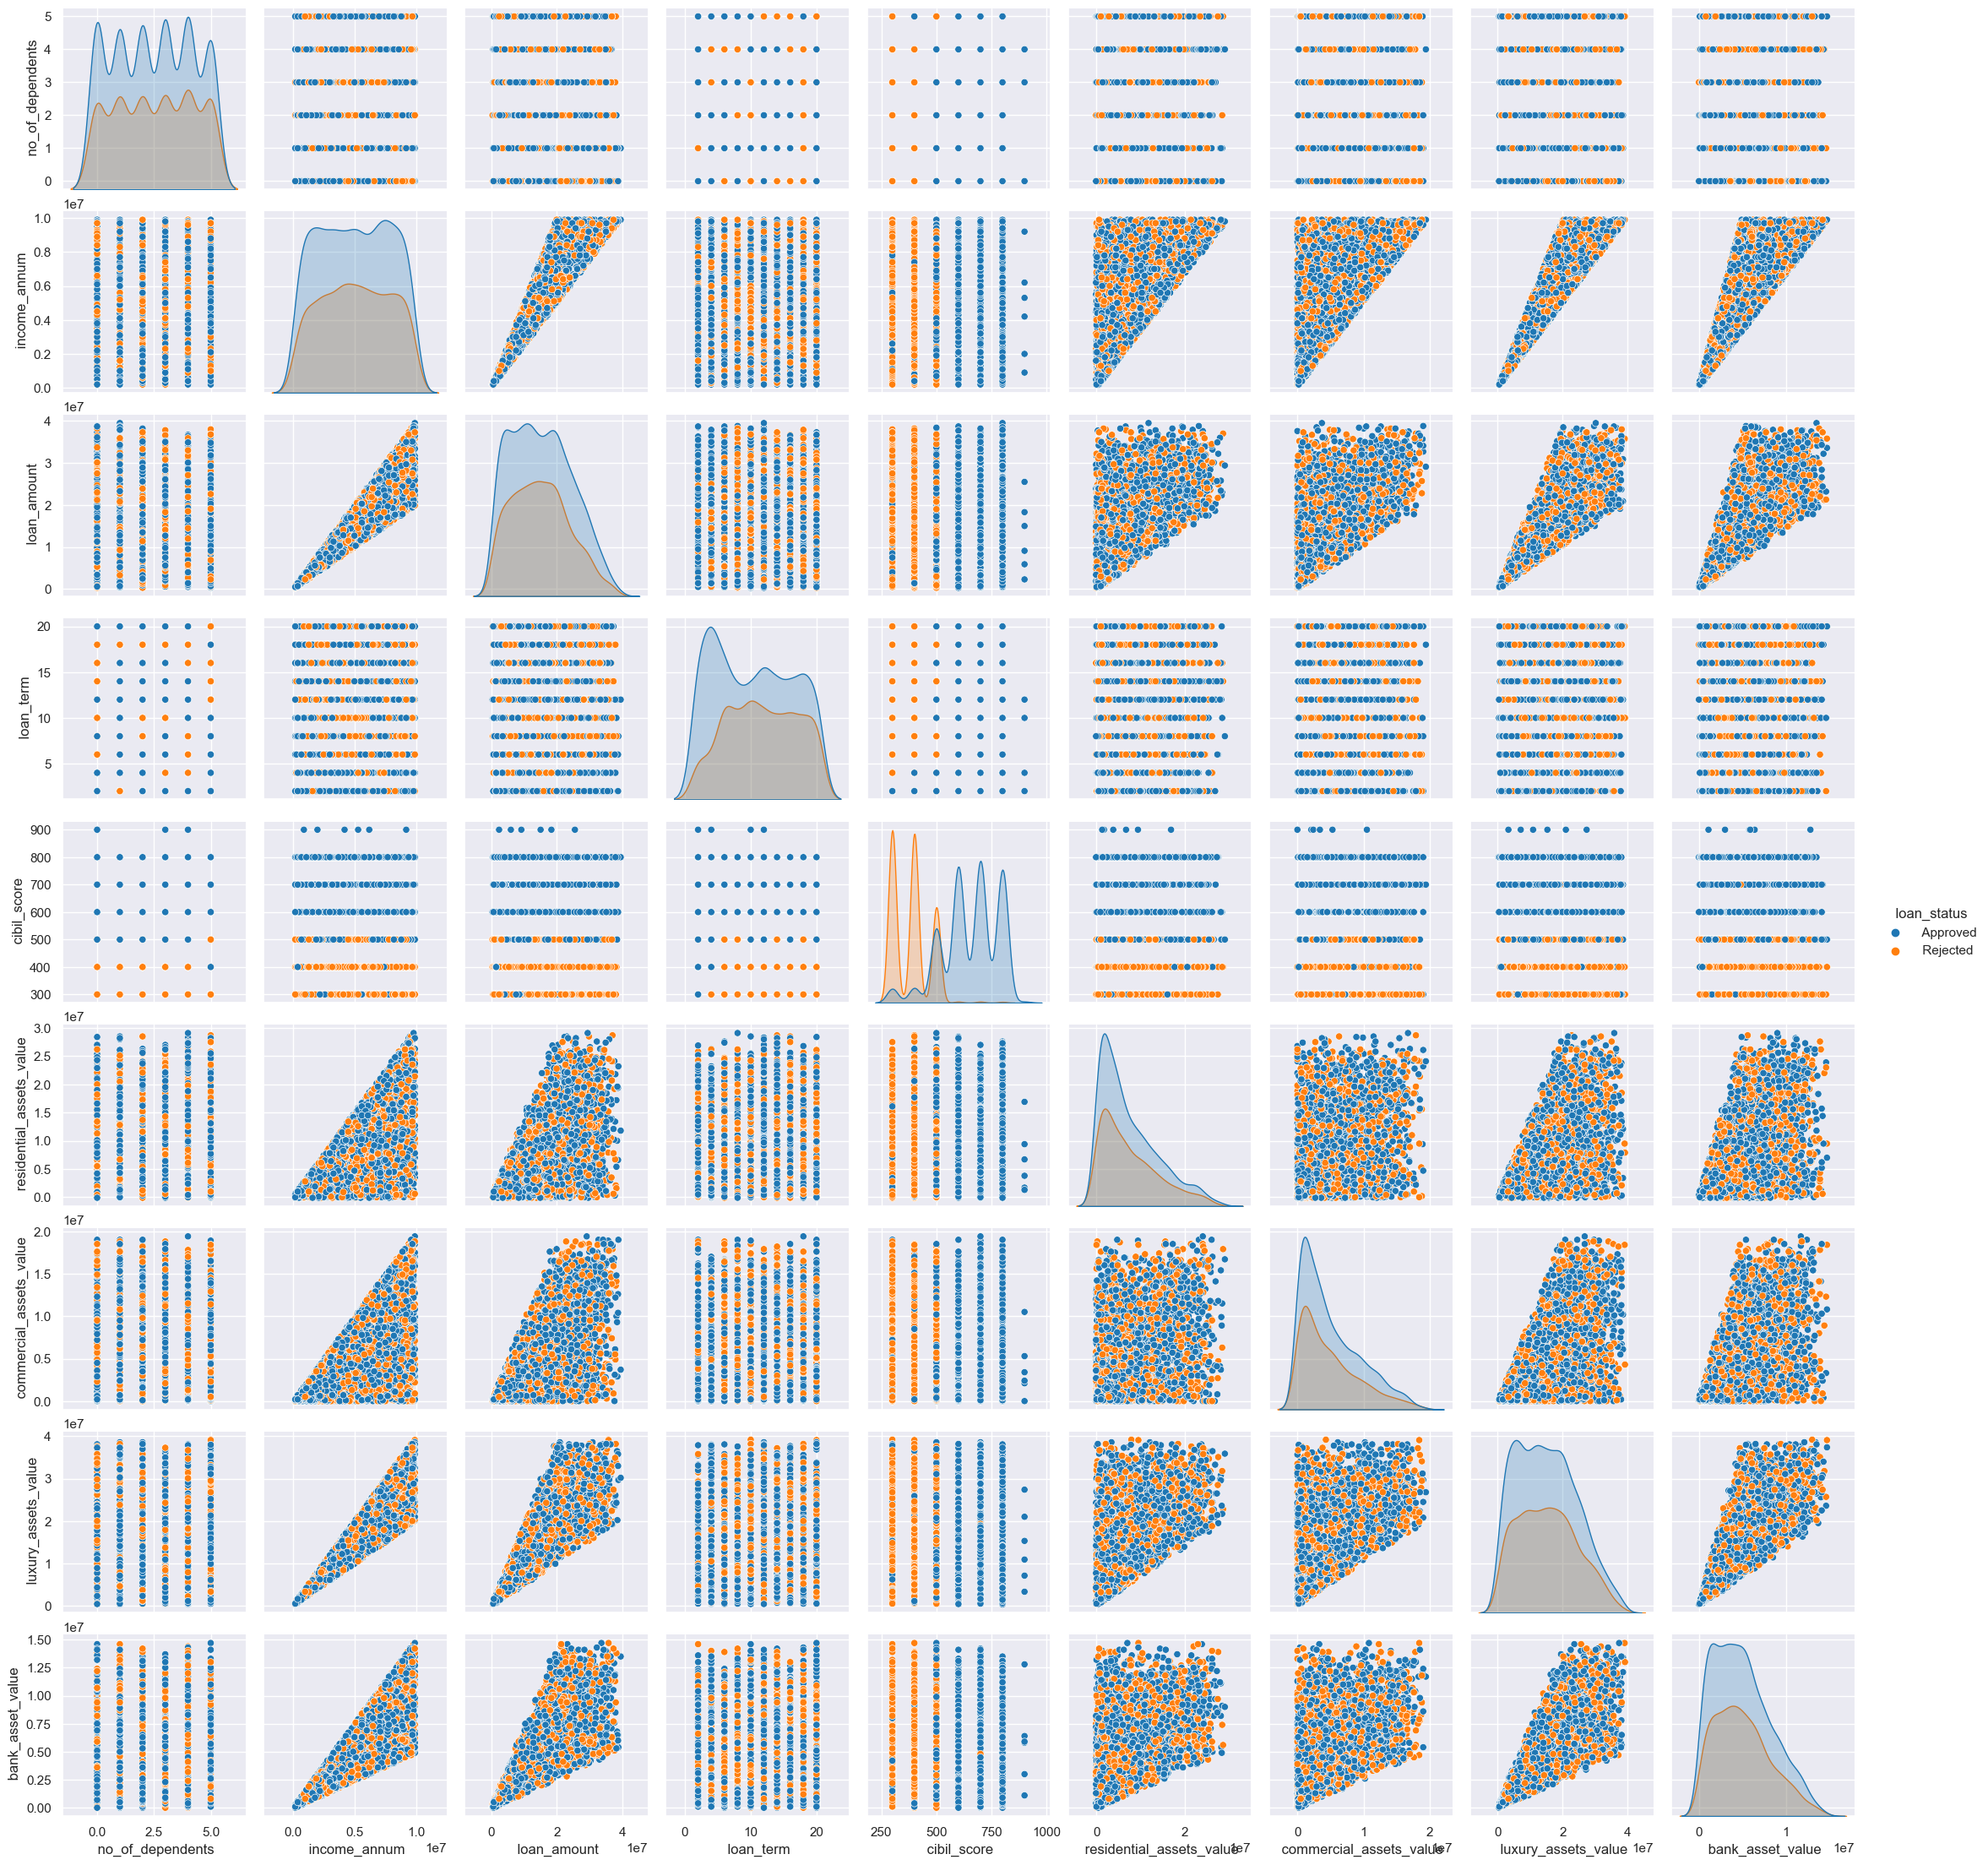

In [9]:
data = data.drop('loan_id', axis=1)
sns.pairplot(data, hue=' loan_status', palette='tab10')

In [10]:
#graphs = sns.displot(data, x=' cibil_score', multiple='dodge', )
px.bar(data1, x=' loan_status', color=' cibil_score' )


Exploring the approved loan with Cibil score below 300

In [11]:
data2 = data.sort_values([' loan_status', ' cibil_score', ' education',' loan_term'])
data3 = data2.loc[data[' cibil_score'] == 300 ]
data3 = data3.loc[data[' loan_status'] == ' Approved']
#data3 = data3.loc[data[' loan_term'] <= 4]
data3

no_of_dependents      education  self_employed   income_annum  \
95                    5       Graduate             No         300000   
152                   1       Graduate            Yes        6500000   
264                   5       Graduate            Yes        3800000   
361                   0       Graduate             No        4400000   
915                   4       Graduate            Yes        8200000   
...                 ...            ...            ...            ...   
3378                  3   Not Graduate             No        3800000   
3723                  1   Not Graduate             No        3500000   
3909                  1   Not Graduate            Yes        9100000   
4075                  4   Not Graduate            Yes        2600000   
4081                  2   Not Graduate            Yes        4400000   

       loan_amount   loan_term   cibil_score   residential_assets_value  \
95         1100000           2           300                     100000   
152       20600000           2           300                   15900000   
264       14400000           2           300                    3300000   
361       14100000           2           300                    3300000   
915       28500000           2           300                    6800000   
...            ...         ...           ...                        ...   
3378      11400000           4           300                    5800000   
3723      12700000           4           300                    5200000   
3909      31400000           4           300                   14100000   
4075       8500000           4           300                    5500000   
4081      16800000           4           300                   12800000   

       commercial_assets_value   luxury_assets_value   bank_asset_value  \
95                      500000                700000             400000   
152                    1900000              18100000            3200000   
264                     800000              13000000            4700000   
361                    1300000               8800000            6200000   
915                   11200000              26400000           11500000   
...                        ...                   ...                ...   
3378                   4000000               9600000            4400000   
3723                   6800000              12900000            1800000   
3909                  16700000              30200000            9600000   
4075                    100000               8800000            2900000   
4081                   7200000               9700000            5800000   

      loan_status  
95       Approved  
152      Approved  
264      Approved  
361      Approved  
915      Approved  
...           ...  
3378     Approved  
3723     Approved  
3909     Approved  
4075     Approved  
4081     Approved  

[72 rows x 12 columns]

In [12]:
sns.pairplot(data3, hue=' loan_status', palette='tab10')

In [13]:
px.bar(data3, y=' loan_term', x=' loan_status')

Pode-se infere que: Pessoas com Cibil score maior que 300 e com mais garantias (itens luxuosos, ganhos anuais possuem maiores chances de terem um emprestimo aprovado dada as possíveis garantias).
pode-se concluir que pessoas com cibil score de até 300  conseguem a aprovação quanto tem um loan term de até 4 o que representa um total de 1,68% dos clientes


It can be inferred that: People with a Cibil score greater than 300 and with more guarantees (luxury items, annual earnings are more likely to have a loan approved given the possible guarantees).
it can also be concluded that people with a cibil score of up to 300 get approval when they have a loan term of up to 4, which represents a total of 1.68% of customers

